# Pandas 学习笔记

* 版本号： 0.3
* 创建时间： 2015年02月07日 星期六 10:26:33 CST
* 修改时间： 2021年11月18日
* 数据来源：
 * movies.csv http://boxofficemojo.com/daily/
 * iris.csv https://github.com/dsaber/py-viz-blog
 * titanic.csv https://github.com/dsaber/py-viz-blog
 * ts.csv https://github.com/dsaber/py-viz-blog

## 一些准备工作

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
# 辅助函数
def get_movie_df():
    """
    获得 movie dataframe
    """
    return pd.read_csv('datas/movies.csv', sep='\t', encoding='utf-8',thousands=',',escapechar='$')

def get_titanic_df():
    return pd.read_csv('datas/titanic.csv')

def get_iris_df():
    return pd.read_csv('datas/iris.csv')

def get_random_df():
    return pd.DataFrame(
        np.random.randn(6, 4),
        index=pd.date_range('20200101', periods=6),
        columns=list('ABCD'))

## 安装使用
2020年1月更新:

* jupyter 已经进化出 `jupyter-lab` 了。

2018年更新:

ipython notebook 已更名为 jupyter notebook 。安装使用方法如下：
* 安装 anaconda ，anaconda 是一个 Python 发行版。装好后就已经包含 `pandas` 和 `jupyter notebook` 。
* 运行 `jupyter notebook` 命令就可以使用 jupyter notebook 。
* 要在 notebook 即时显示图表，可以使用在 notebook 中使用 `%matplotlib inline` 命令。

下面是以前的安装使用方法：

* 安装 pandas
```shell
sudo apt-get install build-essential python-dev
sudo apt-get install python-pandas python-tk
sudo apt-get install python-scipy python-matplotlib python-tables
sudo apt-get install python-numexpr python-xlrd python-statsmodels
sudo apt-get install python-openpyxl python-xlwt python-bs4
```    
if use virtualenv before install matplotlib should install libpng-dev, libjpeg8-dev, libfreetype6-dev

* 安装 ipython-notebook
```shell
sudo pip install "ipython[notebook]"
sudo pip install pygments
```
* 使用``ipython notebook``运行 ipython-notebook 。如果使用matplotlib内嵌进网页中,那么需要运行:`ipython notebook --matplotlib inline` ；或者在已经打开的 notebook 中运行 `%matplotlib inline` 命令。

In [2]:
# 查看 pandas 的版本
# pd.__version__
# 查看当前环境涉及软件的版本
# pd.show_versions()

## DataFrame 速览

### 创建

In [3]:
data = {
    'fruit': ['Apple', 'Apple', 'Apple', 'Grape', 'Grape', 'Grape'],
    'year': [2017, 2018, 2019, 2017, 2018, 2019],
    'price': [20.5, 21.3, 25, 10.1, 10.9, 9.98]
}
frame = DataFrame(data)
frame

,fruit,year,price
0,Apple,2017,20.50
1,Apple,2018,21.30
2,Apple,2019,25.00
3,Grape,2017,10.10
4,Grape,2018,10.90
5,Grape,2019,9.98


生成时指定 columns 和 index ，index 的长度要与行数相匹配

In [4]:
frame2 = DataFrame(
    data,
    columns = ['year', 'month', 'fruit', 'price'],
    index = ['one', 'two', 'three', 'four', 'five', 'six']
)
frame2

,year,month,fruit,price
one,2017,NaN,Apple,20.50
two,2018,NaN,Apple,21.30
three,2019,NaN,Apple,25.00
four,2017,NaN,Grape,10.10
five,2018,NaN,Grape,10.90
six,2019,NaN,Grape,9.98


### 查看数据

通过类似字典标记的方式或属性的方式,可以将 `DataFrame` 的列获取为一个 `Series` 。
IPython 提供了类似属性的访问(即frame2.year)和tab补全。
frame2[column] 适用于任何列的名,但是 frame2.column 只有在列名是一个合理
的 Python 变量名时才适用。
注意,返回的 Series 拥有原 DataFrame 相同的索引,且其 name 属性也已经被相应地
设置好了。

In [5]:
frame2['fruit']

one      Apple
two      Apple
three    Apple
four     Grape
five     Grape
six      Grape
Name: fruit, dtype: object

In [6]:
frame2.year

one      2017
two      2018
three    2019
four     2017
five     2018
six      2019
Name: year, dtype: int64

In [7]:
frame2.loc['two']

year      2018
month      NaN
fruit    Apple
price     21.3
Name: two, dtype: object

### 修改数据

In [8]:
frame2.month = 11
frame2

,year,month,fruit,price
one,2017,11,Apple,20.50
two,2018,11,Apple,21.30
three,2019,11,Apple,25.00
four,2017,11,Grape,10.10
five,2018,11,Grape,10.90
six,2019,11,Grape,9.98


In [9]:
frame2.month = np.arange(6)
frame2

,year,month,fruit,price
one,2017,0,Apple,20.50
two,2018,1,Apple,21.30
three,2019,2,Apple,25.00
four,2017,3,Grape,10.10
five,2018,4,Grape,10.90
six,2019,5,Grape,9.98


DataFrame 的切片是 DataFrame 的视图，不是副本。对切片赋值会改变 DataFrame
本身。

In [10]:
c_month = frame2['month']
c_month

one      0
two      1
three    2
four     3
five     4
six      5
Name: month, dtype: int64

In [11]:
month = Series([1,3,5], index=['one', 'three', 'five'])
frame2['month'] = month
frame2

,year,month,fruit,price
one,2017,1.0,Apple,20.50
two,2018,NaN,Apple,21.30
three,2019,3.0,Apple,25.00
four,2017,NaN,Grape,10.10
five,2018,5.0,Grape,10.90
six,2019,NaN,Grape,9.98


In [12]:
# c_month['two'] = 2.2 
# 这种方式也能改写值，但是因为性能的问题不推荐使用，详见：
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
frame2.loc['two', 'month'] = 2.2
frame2

,year,month,fruit,price
one,2017,1.0,Apple,20.50
two,2018,2.2,Apple,21.30
three,2019,3.0,Apple,25.00
four,2017,NaN,Grape,10.10
five,2018,5.0,Grape,10.90
six,2019,NaN,Grape,9.98


### 删除数据

In [13]:
del frame2['month'] #  删除 column
frame2

,year,fruit,price
one,2017,Apple,20.50
two,2018,Apple,21.30
three,2019,Apple,25.00
four,2017,Grape,10.10
five,2018,Grape,10.90
six,2019,Grape,9.98


## pandas 的索引对象

In [14]:
nums = Series(range(3), index=['one', 'two', 'three'])

In [15]:
num_index = nums.index

In [16]:
num_index

Index(['one', 'two', 'three'], dtype='object')

In [17]:
num_index[1:]

Index(['two', 'three'], dtype='object')

索引对象是不可变的，不能对其赋值

In [18]:
num_index2 = pd.Index(['one', 'two', 'three'])

In [19]:
num_index is num_index2

False

In [20]:
num_index == num_index2

array([ True,  True,  True])

In [21]:
nums2= Series(range(3), index = num_index2)

In [22]:
nums2

one      0
two      1
three    2
dtype: int64

In [23]:
nums2.index is num_index2

True

In [24]:
nums2.index == num_index2

array([ True,  True,  True])

In [25]:
frame3 = get_random_df()

In [26]:
frame3.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [27]:
frame3.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

### reindex

#### Series reindex

In [28]:
obj = Series(range(4), index=['a', 'c', 'd', 'b'])
obj

a    0
c    1
d    2
b    3
dtype: int64

In [29]:
obj2 = obj.reindex(['a', 'b', 'c', 'd'])

In [30]:
obj2

a    0
b    3
c    1
d    2
dtype: int64

#### 自动填充

In [31]:
obj3 = Series(['red', 'blue', 'yellow'], index=[1,3,5])

In [32]:
obj3

1       red
3      blue
5    yellow
dtype: object

In [33]:
obj3.reindex(range(6), method='ffill')

0       NaN
1       red
2       red
3      blue
4      blue
5    yellow
dtype: object

#### Frame reindex

In [34]:
range(5)

range(0, 5)

In [35]:
df = pd.DataFrame(
        np.random.randn(6, 4),
        index=range(6),
        columns=list('ABCD'))
df

,A,B,C,D
0,-1.981692,0.431559,1.265458,-0.280410
1,-1.467613,-0.863108,0.642762,0.090772
2,1.442440,-0.585124,-0.021404,-0.431891
3,-0.894200,-0.772455,0.381860,-0.310073
4,-1.229319,0.992637,0.786276,-0.274459
5,-0.974433,0.991664,1.016668,-0.086624


In [36]:
df.reindex(range(5,-1,-1), columns=['A', 'C', 'DDD'])

,A,C,DDD
5,-0.974433,1.016668,NaN
4,-1.229319,0.786276,NaN
3,-0.894200,0.381860,NaN
2,1.442440,-0.021404,NaN
1,-1.467613,0.642762,NaN
0,-1.981692,1.265458,NaN


#### drop

In [37]:
df.drop([0,5])

,A,B,C,D
1,-1.467613,-0.863108,0.642762,0.090772
2,1.442440,-0.585124,-0.021404,-0.431891
3,-0.894200,-0.772455,0.381860,-0.310073
4,-1.229319,0.992637,0.786276,-0.274459


In [38]:
df.drop('D', axis='columns') #  不修改对象

,A,B,C
0,-1.981692,0.431559,1.265458
1,-1.467613,-0.863108,0.642762
2,1.442440,-0.585124,-0.021404
3,-0.894200,-0.772455,0.381860
4,-1.229319,0.992637,0.786276
5,-0.974433,0.991664,1.016668


In [39]:
df

,A,B,C,D
0,-1.981692,0.431559,1.265458,-0.280410
1,-1.467613,-0.863108,0.642762,0.090772
2,1.442440,-0.585124,-0.021404,-0.431891
3,-0.894200,-0.772455,0.381860,-0.310073
4,-1.229319,0.992637,0.786276,-0.274459
5,-0.974433,0.991664,1.016668,-0.086624


In [40]:
df.drop('D', axis='columns', inplace=True) #  修改对象

In [41]:
df

,A,B,C
0,-1.981692,0.431559,1.265458
1,-1.467613,-0.863108,0.642762
2,1.442440,-0.585124,-0.021404
3,-0.894200,-0.772455,0.381860
4,-1.229319,0.992637,0.786276
5,-0.974433,0.991664,1.016668


## DataFrames 创建

In [42]:
dates = pd.date_range('20180101', periods=6);dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [43]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'));df

,A,B,C,D
2018-01-01,-0.641316,-0.674096,-0.432712,0.749219
2018-01-02,0.582931,-0.931636,-0.278993,-0.253118
2018-01-03,0.308169,-0.728290,-0.171988,-1.987203
2018-01-04,-1.215662,1.261831,-2.407712,0.749945
2018-01-05,-0.989210,0.531887,1.947686,0.159891
2018-01-06,1.184290,0.572910,1.394792,2.442256


In [44]:
# 可以使用字典来创建 DataFrame 。
# 如果字典的 Value 是单一值，那么会自动扩展。
# 如果字典的 Value 是列表或者 Series ，那么长度要保持一致。
# 如果字典中只有一个值有 Index ，那么会使用这个 Index 作为整个 DataFrame 的 Index 。
# 如果字典有多个 Index ，那么必须保持一致，否则会报错。
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(2,6)),dtype='float32'), 
      'D' : np.array([3] * 4,dtype='int32'), 
      'E' : pd.Categorical(["test","train","test","train"]), 
      'F' : 'foo' }
)
df2

,A,B,C,D,E,F
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo
4,1.0,2013-01-02,1.0,3,test,foo
5,1.0,2013-01-02,1.0,3,train,foo


In [45]:
data = {
    'fruit': ['Apple', 'Apple', 'Apple', 'Grape', 'Grape', 'Grape'],
    'year': [2017, 2018, 2019, 2017, 2018, 2019],
    'price': [20.5, 21.3, 25, 10.1, 10.9, 9.98]
}
frame = DataFrame(data)

## DataFrame 全局操作

In [46]:
df = get_random_df()

In [47]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [48]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [49]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [50]:
df.values

array([[ 0.58960302, -0.19577649, -0.00824168, -1.008918  ],
       [-0.57216355, -1.50805737, -1.13640656,  0.47105459],
       [-0.59550774,  2.14649034, -0.21757789,  0.13995194],
       [ 0.93981742, -0.76565382,  0.88382764,  0.70731021],
       [-0.69314374,  0.07583509,  0.07626148,  0.86108068],
       [ 0.35534218,  0.10880558, -1.58238107,  0.85682813]])

In [51]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.003991,-0.023059,-0.330753,0.337885
std,0.709861,1.226427,0.891441,0.714185
min,-0.693144,-1.508057,-1.582381,-1.008918
25%,-0.589672,-0.623184,-0.906699,0.222728
50%,-0.108411,-0.059971,-0.112910,0.589182
75%,0.531038,0.100563,0.055136,0.819449
max,0.939817,2.146490,0.883828,0.861081


In [52]:
df.T

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06
A,0.589603,-0.572164,-0.595508,0.939817,-0.693144,0.355342
B,-0.195776,-1.508057,2.146490,-0.765654,0.075835,0.108806
C,-0.008242,-1.136407,-0.217578,0.883828,0.076261,-1.582381
D,-1.008918,0.471055,0.139952,0.707310,0.861081,0.856828


## 读入数据

### 从  CSV 文件读入数据

In [53]:
# 读入 CSV 格式数据
df_movies = pd.read_csv('datas/movies.csv', sep='\t', encoding='utf-8')
df_movies.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,"$26,168,351",American Sniper,"$9,905,616"
1,2,Jan. 31,Sat,31,"$41,633,588",American Sniper,"$16,510,536"
2,3,Feb. 1,Sun,32,"$12,515,579",American Sniper,"$4,244,376"
3,4,Feb. 2,Mon,33,"$6,475,068",American Sniper,"$2,645,109"
4,5,Feb. 3,Tue,34,"$7,825,091",American Sniper,"$2,923,141"


In [54]:
df_movies = pd.read_csv('datas/movies.csv', sep='\t', encoding='utf-8',thousands=',',escapechar='$')
df_movies.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


### 从数据库读入数据
参见：http://stackoverflow.com/questions/10065051/python-pandas-and-databases-like-mysql

### 从 Excel 文件读入数据

#### 原型

```python
pandas.read_excel(io, sheet_name=0, header=0, skiprows=None, skip_footer=0,
                  index_col=None, names=None, usecols=None, parse_dates=False,
                  date_parser=None, na_values=None, thousands=None,
                  convert_float=True, converters=None, dtype=None,
                  true_values=None, false_values=None, engine=None,
                  squeeze=False, **kwds)
```
Read an Excel table into a pandas DataFrame

## 复制数据

In [55]:
df = df_movies.copy()
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


## 选择数据

1. 行，列 --> df[]
1. 区域 --> df.loc[], df.iloc[], df.ix[]
1. 单元格 --> df.at[], df.iat[]

### 选择单个数据

In [56]:
df.at[1, 'Date']

'Jan. 31'

In [57]:
df.iat[1,1]

'Jan. 31'

### 选择某个区域

In [58]:
#只显示指定的行和列
df.iloc[[1,3,5],[0,1,2,3]]

,Row,Date,Day,Day#
1,2,Jan. 31,Sat,31
3,4,Feb. 2,Mon,33
5,6,Feb. 4,Wed,35


In [59]:
df.loc[[1,3,5],['Date', 'Gross']]

,Date,Gross
1,Jan. 31,16510536
3,Feb. 2,2645109
5,Feb. 4,2273342


### 选择行

In [60]:
df[1:4] # 第2-4行

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109


In [61]:
# 查看头部数据
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


In [62]:
# 查看尾部数据
df.tail(2)
#head 和 tail 接受一个整数参数，缺省值为 5 。

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
27,28,Feb. 26,Thu,57,7161773,Fifty Shades of Grey,1790520
28,29,Feb. 27,Fri,58,26457000,Focus (2015),6465000


### 选择列

In [63]:
df[['Date', 'Gross']].head()

,Date,Gross
0,Jan. 30,9905616
1,Jan. 31,16510536
2,Feb. 1,4244376
3,Feb. 2,2645109
4,Feb. 3,2923141


In [64]:
df.iloc[:,[1, 2, 6]].head()

,Date,Day,Gross
0,Jan. 30,Fri,9905616
1,Jan. 31,Sat,16510536
2,Feb. 1,Sun,4244376
3,Feb. 2,Mon,2645109
4,Feb. 3,Tue,2923141


In [65]:
# 只包含指定字符的列
df = df_movies.copy()
df.filter(regex='D', axis=1).head()

,Date,Day,Day#
0,Jan. 30,Fri,30
1,Jan. 31,Sat,31
2,Feb. 1,Sun,32
3,Feb. 2,Mon,33
4,Feb. 3,Tue,34


In [66]:
df = df_movies.copy()
# 根据列类型过滤
# 只选择字符串型的列
df.loc[:, (df.dtypes == np.dtype('O')).values].head()

,Date,Day,#1 Movie
0,Jan. 30,Fri,American Sniper
1,Jan. 31,Sat,American Sniper
2,Feb. 1,Sun,American Sniper
3,Feb. 2,Mon,American Sniper
4,Feb. 3,Tue,American Sniper


## 操作单元

In [67]:
df = df_movies.copy()
# 单元格赋值
# 单个单元格赋值
df.iloc[0, 6] = '土豆之歌'
df.loc[df.index[1], 'Gross']= 999
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,土豆之歌
1,2,Jan. 31,Sat,31,41633588,American Sniper,999
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376


In [68]:
# 多单个单元格赋值
df.loc[df.index[0:2], 'Gross'] = [100, 200]
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,100
1,2,Jan. 31,Sat,31,41633588,American Sniper,200
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376


## 操作列

### 调整列的顺序

In [69]:
# 构建 DataFrame
df = pd.DataFrame({'a':[1,2], 'b': [3,4], 'c':[5,6], 'd':[7,8], 'e':[9,10]});df

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法一

In [70]:
col_order = ['c', 'a', 'b', 'd']
df = df[col_order]
df

,c,a,b,d
0,5,1,3,7
1,6,2,4,8


#### 方法二

In [71]:
new_df = df.drop('c', axis=1)
new_df.insert(2, 'c', df['c'])
new_df

,a,b,c,d
0,1,3,5,7
1,2,4,6,8


### 修改一个列头

In [72]:
# 构建 DataFrame
df = pd.DataFrame({'a':[1,2], 'b': [3,4], 'c':[5,6], 'd':[7,8], 'e':[9,10]});df

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [73]:
df.rename(columns={'a':'AA'}, inplace=True);df

,AA,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


### 修改全部列头

转自：https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

Pandas 0.21+ Answer

There have been some significant updates to column renaming in version 0.21.

The rename method has added the axis parameter which may be set to columns or 1. This update makes this method match the rest of the pandas API. It still has the index and columns parameters but you are no longer forced to use them.

The set_axis method with the inplace set to False enables you to rename all the index or column labels with a list.

Examples for Pandas 0.21+

In [74]:
# 构建 DataFrame
df = pd.DataFrame({'$a':[1,2], '$b': [3,4], 
                   '$c':[5,6], '$d':[7,8], 
                   '$e':[9,10]})
df

,$a,$b,$c,$d,$e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法一：使用 rename ，，并且设置 axis='columns' 或者 axis=1

In [75]:
df.rename({'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'}, axis='columns')

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [76]:
# 下句与上句结果相同
df.rename({'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'}, axis=1)

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [77]:
# 老的方法，结果相同
df.rename(columns={'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'})

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [78]:
#rename 函数接受一个函数作为参数，作为参数的函数作用于每一个列名称。
df.rename(lambda x: x[1:], axis='columns')

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [79]:
df.rename(lambda x: x[1:], axis=1)

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法二：使用 set_axis ，把一个 list 作为列名称，并且设置 inplace=False
list 的长度必须与列（或者索引）的数量一致。当前版本（0.24.2， inplace 参数的默认值为 True ，以后可能改为 False 。

In [80]:
df.set_axis(['a', 'b', 'c', 'd', 'e'], axis='columns', inplace=False)

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [81]:
df.set_axis(['a', 'b', 'c', 'd', 'e'], axis=1, inplace=False)

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法三：使用 columns 属性

In [82]:
df.columns = ['a', 'b', 'c', 'd', 'e']
df

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


Why not use df.columns = ['a', 'b', 'c', 'd', 'e']?

There is nothing wrong with assigning columns directly like this. It is a perfectly good solution.

The advantage of using set_axis is that it can be used as part of a method chain and that it returns a new copy of the DataFrame.
Without it, you would have to store your intermediate steps of the chain to another variable before reassigning the columns.
```
# new for pandas 0.21+
df.some_method1()
  .some_method2()
  .set_axis()
  .some_method3()

# old way
df1 = df.some_method1()
        .some_method2()
df1.columns = columns
df1.some_method3()
```

### 打印列类型

In [83]:
df = df_movies.copy()
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Row', 'Day#', 'Top 10 Gross', 'Gross'], object: ['Date', 'Day', '#1 Movie']}

In [84]:
# 打印列类型(清晰打印中文)
types = df.columns.to_series().groupby(df.dtypes).groups
for key, value in types.items():
    print(key,':\t', ','.join(value))

int64 :	 Row,Day#,Top 10 Gross,Gross
object :	 Date,Day,#1 Movie


### 插入列

In [85]:
df = df_movies.copy()
# 方式一：在末尾添加
df['memo'] = pd.Series('', index=df.index)
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,memo
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,


In [86]:
# 方式二：在中间插入
df = df_movies.copy()
df.insert(loc=1, column=u'year', value=u'2015')
df.head(3)

,Row,year,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,2015,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,2015,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,2015,Feb. 1,Sun,32,12515579,American Sniper,4244376


In [87]:
# 根据现有值生成一个新的列
df = df_movies.copy()
df.insert(loc = 5 , column=u'OtherGross', value=df[u'Top 10 Gross'] - df[u'Gross'])
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,OtherGross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,16262735,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,25123052,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,8271203,American Sniper,4244376


In [88]:
# 根据现有值生成多个新的列
df = df_movies.copy()
def process_date_col(text):
    #根据日期生成月份和日两个新的列
    if pd.isnull(text):
        month = day = np.nan
    else:
        month, day = text.split('.')
    return pd.Series([month, day])

df[[u'month', u'day']] = df.Date.apply(process_date_col)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,month,day
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,Jan,30
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,Jan,31
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,Feb,1
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,Feb,2
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,Feb,3


In [89]:
# 根据现有值生成多个新的列
df = df_movies.copy()
df.head()

def process_date_col(se):
    #根据日期生成月份和日两个新的列
    if pd.isnull(se['Date']):
        se['month'] = se['day'] = np.nan
    else:
        se['month'], se['day'] = se['Date'].split('.')
    return se
df['month'] = df['day'] = np.nan
df_new = df.apply(process_date_col, axis=1)
df_new.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,month,day
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,Jan,30
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,Jan,31
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,Feb,1
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,Feb,2
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,Feb,3


### 改变列值

In [90]:
df = get_random_df()
df

,A,B,C,D
2020-01-01,0.598449,-0.343405,-0.336232,1.564981
2020-01-02,-1.776394,-0.655185,-1.960710,-1.297686
2020-01-03,0.011752,-0.393321,0.107292,1.261636
2020-01-04,-0.704756,-0.068928,-0.274512,0.087989
2020-01-05,-1.561700,0.081027,0.160828,-1.990220
2020-01-06,-1.139726,0.729122,0.567693,1.949325


In [91]:
# 根据一列的值改变本列的值
# 方法一
# 把 C 列小于 0 的数据设置为 0 
df.loc[df.C < 0, 'C'] = 0
df

,A,B,C,D
2020-01-01,0.598449,-0.343405,0.000000,1.564981
2020-01-02,-1.776394,-0.655185,0.000000,-1.297686
2020-01-03,0.011752,-0.393321,0.107292,1.261636
2020-01-04,-0.704756,-0.068928,0.000000,0.087989
2020-01-05,-1.561700,0.081027,0.160828,-1.990220
2020-01-06,-1.139726,0.729122,0.567693,1.949325


In [92]:
# 根据一列的值改变本列的值
# 方法二
# 把 C 列小于 0 的数据设置为 0 
df['D'] = df['D'].apply(lambda x : 0 if x<0 else x)
df

,A,B,C,D
2020-01-01,0.598449,-0.343405,0.000000,1.564981
2020-01-02,-1.776394,-0.655185,0.000000,0.000000
2020-01-03,0.011752,-0.393321,0.107292,1.261636
2020-01-04,-0.704756,-0.068928,0.000000,0.087989
2020-01-05,-1.561700,0.081027,0.160828,0.000000
2020-01-06,-1.139726,0.729122,0.567693,1.949325


In [93]:
# 同时改变多个列的值
# 把 A B 两列数据均乘以 100
cols = ['A', 'B']
df[cols] = df[cols].applymap(lambda x: x*100)
df

,A,B,C,D
2020-01-01,59.844883,-34.340501,0.000000,1.564981
2020-01-02,-177.639426,-65.518534,0.000000,0.000000
2020-01-03,1.175221,-39.332118,0.107292,1.261636
2020-01-04,-70.475643,-6.892764,0.000000,0.087989
2020-01-05,-156.170047,8.102672,0.160828,0.000000
2020-01-06,-113.972600,72.912210,0.567693,1.949325


### 删除列

In [94]:
df = get_movie_df()
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


In [95]:
df.drop(df[['Date', 'Gross']], axis=1, inplace=True)
df.head()

,Row,Day,Day#,Top 10 Gross,#1 Movie
0,1,Fri,30,26168351,American Sniper
1,2,Sat,31,41633588,American Sniper
2,3,Sun,32,12515579,American Sniper
3,4,Mon,33,6475068,American Sniper
4,5,Tue,34,7825091,American Sniper


In [96]:
df = get_movie_df()
del df['Date']
df.head()

,Row,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Fri,30,26168351,American Sniper,9905616
1,2,Sat,31,41633588,American Sniper,16510536
2,3,Sun,32,12515579,American Sniper,4244376
3,4,Mon,33,6475068,American Sniper,2645109
4,5,Tue,34,7825091,American Sniper,2923141


In [97]:
df.drop(columns=['Row', 'Gross'], axis=1).head()

,Day,Day#,Top 10 Gross,#1 Movie
0,Fri,30,26168351,American Sniper
1,Sat,31,41633588,American Sniper
2,Sun,32,12515579,American Sniper
3,Mon,33,6475068,American Sniper
4,Tue,34,7825091,American Sniper


## 操作行

In [98]:
df = get_iris_df()
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


### 处理行 Index

#### 把行 Index 改成由1开始

In [99]:
df.index = range(1,len(df) + 1)
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
1,1.4,0.2,5.1,3.5,setosa
2,1.4,0.2,4.9,3.0,setosa
3,1.3,0.2,4.7,3.2,setosa
4,1.5,0.2,4.6,3.1,setosa
5,1.4,0.2,5.0,3.6,setosa


In [100]:
# 添加一个空行
new_df = df.append(pd.Series(
                [np.nan]*len(df.columns), # Fill cells with NaNs
                index=df.columns),
                ignore_index=True)
new_df.tail()

,petalLength,petalWidth,sepalLength,sepalWidth,species
146,5.0,1.9,6.3,2.5,virginica
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica
149,5.1,1.8,5.9,3.0,virginica
150,NaN,NaN,NaN,NaN,NaN


### 删除空行

In [101]:
df[~(df['petalLength'].isnull())]

,petalLength,petalWidth,sepalLength,sepalWidth,species
1,1.4,0.2,5.1,3.5,setosa
2,1.4,0.2,4.9,3.0,setosa
3,1.3,0.2,4.7,3.2,setosa
4,1.5,0.2,4.6,3.1,setosa
5,1.4,0.2,5.0,3.6,setosa
...,...,...,...,...,...
146,5.2,2.3,6.7,3.0,virginica
147,5.0,1.9,6.3,2.5,virginica
148,5.2,2.0,6.5,3.0,virginica
149,5.4,2.3,6.2,3.4,virginica


## apply, applymap, map 区别

* apply：应用在DataFrame的行或列中；
* applymap：应用在DataFrame的每个元素中；
* map：应用在单独一列（Series）的每个元素中。

In [102]:
df = pd.DataFrame(np.random.randn(2, 2), columns=list('AB'));df

,A,B
0,-0.671187,-1.168787
1,0.914042,1.100162


In [103]:
# 行的和
df.apply(np.sum)

A    0.242855
B   -0.068625
dtype: float64

In [104]:
# 列的和
df.apply(np.sum, axis=1)

0   -1.839974
1    2.014204
dtype: float64

In [105]:
# 保留两位小数
df.applymap(lambda x: '%.2f'%x)

,A,B
0,-0.67,-1.17
1,0.91,1.10


In [106]:
# 保留两位小数，只处理某一列，返回一个 DataFrame
df[['A']].applymap(lambda x: '%.2f'%x)

,A
0,-0.67
1,0.91


In [107]:
# 保留两位小数，只处理某一列，返回一个 Series
df['A'].map(lambda x: '%.2f'%x)

0    -0.67
1     0.91
Name: A, dtype: object

## 空值处理（NaN）

In [108]:
# 计数有空值的行
nans = df.shape[0] - df.dropna().shape[0]
print(u'一共有 %d 行出现空值' % nans)

# 填充空值为`无`
df.fillna(value=u'无', inplace=True)
df.tail()

一共有 0 行出现空值


,A,B
0,-0.671187,-1.168787
1,0.914042,1.100162


## 排序

In [109]:
df = df_movies.copy()
# 添加一个空行
df = df.append(pd.Series(
                [np.nan]*len(df.columns), # Fill cells with NaNs
                index=df.columns),
                ignore_index=True)
# 根据某一列排序（由低到高）
df.sort_values(u'Gross', ascending=True, inplace=True)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
12,13.0,Feb. 11,Wed,42.0,6138013.0,American Sniper,1468160.0
13,14.0,Feb. 12,Thu,43.0,5969515.0,SpongeBob,1527552.0
26,27.0,Feb. 25,Wed,56.0,6862942.0,Fifty Shades of Grey,1772230.0
27,28.0,Feb. 26,Thu,57.0,7161773.0,Fifty Shades of Grey,1790520.0
24,25.0,Feb. 23,Mon,54.0,7385671.0,Fifty Shades of Grey,1846390.0


In [110]:
# 排序后重新编制索引
df.index = range(1,len(df.index)+1)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
1,13.0,Feb. 11,Wed,42.0,6138013.0,American Sniper,1468160.0
2,14.0,Feb. 12,Thu,43.0,5969515.0,SpongeBob,1527552.0
3,27.0,Feb. 25,Wed,56.0,6862942.0,Fifty Shades of Grey,1772230.0
4,28.0,Feb. 26,Thu,57.0,7161773.0,Fifty Shades of Grey,1790520.0
5,25.0,Feb. 23,Mon,54.0,7385671.0,Fifty Shades of Grey,1846390.0


## 过滤

In [111]:
df = get_titanic_df()

In [112]:
# 选择 deck 为空值的行
df[df['deck'].isnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [113]:
df[df.deck.isna()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [114]:
# 选择 deck 为非空值的行
df[df.deck.notnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [115]:
# 根据条件过滤
df[(df['class'] == 'First') | (df.deck == 'E') ].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True


In [116]:
df[ (df['class'] == 'First') & (df.sex == 'female') & (df.age < 30)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
136,1,1,female,19.0,0,2,26.2833,S,First,woman,False,D,Southampton,yes,False
151,1,1,female,22.0,1,0,66.6000,S,First,woman,False,C,Southampton,yes,False
290,1,1,female,26.0,0,0,78.8500,S,First,woman,False,NaN,Southampton,yes,True
291,1,1,female,19.0,1,0,91.0792,C,First,woman,False,B,Cherbourg,yes,False


## 合并

### append

In [117]:
df_a = get_random_df()
df_b = get_random_df()
df_a.append(df_b)

,A,B,C,D
2020-01-01,-0.111651,-0.223500,-1.623665,0.438040
2020-01-02,0.569454,-1.054826,1.166425,-0.906784
2020-01-03,1.750348,-1.179157,0.297452,-0.330911
2020-01-04,-0.285845,-0.112369,0.963262,-0.920508
2020-01-05,-0.799624,0.178560,-0.372569,1.073806
2020-01-06,-0.610837,-0.713660,-1.517435,-0.543449
2020-01-01,0.010144,0.588250,1.253550,0.637502
2020-01-02,0.666686,0.247768,-0.731746,-1.533164
2020-01-03,0.561260,-1.913553,-1.038617,1.225970
2020-01-04,-0.764545,-1.584214,1.700780,1.784885


### join

In [118]:
# 列名相同的话，要指定后缀
df_a.join(df_b, lsuffix='_left')

,A_left,B_left,C_left,D_left,A,B,C,D
2020-01-01,-0.111651,-0.223500,-1.623665,0.438040,0.010144,0.588250,1.253550,0.637502
2020-01-02,0.569454,-1.054826,1.166425,-0.906784,0.666686,0.247768,-0.731746,-1.533164
2020-01-03,1.750348,-1.179157,0.297452,-0.330911,0.561260,-1.913553,-1.038617,1.225970
2020-01-04,-0.285845,-0.112369,0.963262,-0.920508,-0.764545,-1.584214,1.700780,1.784885
2020-01-05,-0.799624,0.178560,-0.372569,1.073806,-0.080562,0.912078,-0.020078,1.247597
2020-01-06,-0.610837,-0.713660,-1.517435,-0.543449,0.364877,-0.295398,0.077122,-1.658979


### concat

In [119]:
# 纵向合并
pd.concat([df_a, df_b])

,A,B,C,D
2020-01-01,-0.111651,-0.223500,-1.623665,0.438040
2020-01-02,0.569454,-1.054826,1.166425,-0.906784
2020-01-03,1.750348,-1.179157,0.297452,-0.330911
2020-01-04,-0.285845,-0.112369,0.963262,-0.920508
2020-01-05,-0.799624,0.178560,-0.372569,1.073806
2020-01-06,-0.610837,-0.713660,-1.517435,-0.543449
2020-01-01,0.010144,0.588250,1.253550,0.637502
2020-01-02,0.666686,0.247768,-0.731746,-1.533164
2020-01-03,0.561260,-1.913553,-1.038617,1.225970
2020-01-04,-0.764545,-1.584214,1.700780,1.784885


In [120]:
# 横向合并
pd.concat([df_a, df_b], axis=1)

,A,B,C,D,A,B,C,D
2020-01-01,-0.111651,-0.223500,-1.623665,0.438040,0.010144,0.588250,1.253550,0.637502
2020-01-02,0.569454,-1.054826,1.166425,-0.906784,0.666686,0.247768,-0.731746,-1.533164
2020-01-03,1.750348,-1.179157,0.297452,-0.330911,0.561260,-1.913553,-1.038617,1.225970
2020-01-04,-0.285845,-0.112369,0.963262,-0.920508,-0.764545,-1.584214,1.700780,1.784885
2020-01-05,-0.799624,0.178560,-0.372569,1.073806,-0.080562,0.912078,-0.020078,1.247597
2020-01-06,-0.610837,-0.713660,-1.517435,-0.543449,0.364877,-0.295398,0.077122,-1.658979


### merge
- left与right：两个不同的DataFrame
- how：指的是合并(连接)的方式有[inner(内连接)](https://www.jianshu.com/p/b07bc5c650ea#内连接),[left(左外连接)](https://www.jianshu.com/p/b07bc5c650ea#左外连接),[right(右外连接)](https://www.jianshu.com/p/b07bc5c650ea#右外连接),[outer(全外连接)](https://www.jianshu.com/p/b07bc5c650ea#全外连接);默认为inner
- on : 指的是用于连接的列索引名称。必须存在右右两个DataFrame对象中，如果没有指定且其他参数也未指定则以两个DataFrame的列名交集做为连接键
- left_on：左则DataFrame中用作连接键的列名;这个参数中左右列名不相同，但代表的含义相同时非常有用。
- right_on：右则DataFrame中用作 连接键的列名
- left_index：使用左则DataFrame中的行索引做为连接键
- right_index：使用右则DataFrame中的行索引做为连接键
- sort：默认为True，将合并的数据进行排序。在大多数情况下设置为False可以提高性能
- suffixes：字符串值组成的元组，用于指定当左右DataFrame存在相同列名时在列名后面附加的后缀名称，默认为('_x','_y')
- copy：默认为True,总是将数据复制到数据结构中；大多数情况下设置为False可以提高性能
- indicator：在 0.17.0中还增加了一个显示合并数据中来源情况；如只来自己于左边(left_only)、两者(both)

In [121]:
data1 = {
    'id': ['001','002','003', '004'],
    'xm': ['小明', '小王', '小李', '小明'],
    'xb': ['男', '男', '男', '女'],
}
data2 = {
    'id': ['001','002','003'],
    '数学': [100, 95, 99],
}
df1 = DataFrame(data1)
df2 = DataFrame(data2)
pd.merge(df1, df2)

,id,xm,xb,数学
0,001,小明,男,100
1,002,小王,男,95
2,003,小李,男,99


In [122]:
# 使用多个 key
data2 = {
    'xm': ['小王', '小李', '小明'],
    'xb': ['男', '男', '女'],    
}
df2 = DataFrame(data2)
pd.merge(df1, df2, on=['xm', 'xb'])

,id,xm,xb
0,002,小王,男
1,003,小李,男
2,004,小明,女


In [123]:
pd.merge(df1, df2, on=['xm', 'xb'], how='left')

,id,xm,xb
0,001,小明,男
1,002,小王,男
2,003,小李,男
3,004,小明,女


In [124]:
# 指定合并的 key
data1 = {
    '序号': ['001','002','003', '004'],
    'xm': ['小明', '小王', '小李', '小明'],
    'xb': ['男', '男', '男', '女'],
}
data2 = {
    'id': ['001','002','003'],
    '数学': [100, 95, 99],
}
df1 = DataFrame(data1)
df2 = DataFrame(data2)
pd.merge(df1, df2, left_on='序号', right_on='id')

,序号,xm,xb,id,数学
0,001,小明,男,001,100
1,002,小王,男,002,95
2,003,小李,男,003,99


In [125]:
pd.merge(df1, df2, left_on='序号', right_on='id', how='left')

,序号,xm,xb,id,数学
0,001,小明,男,001,100.0
1,002,小王,男,002,95.0
2,003,小李,男,003,99.0
3,004,小明,女,NaN,NaN


## 统计：计数，平均，最大，最小，方差，标准差，同比，环比

### 总体描述

In [126]:
df=get_titanic_df()
df.describe()  # 总体数据描述，只包括数值型数据

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [127]:
df.describe(include='all')  # 总体数据描述，包括所有类型数据

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### 计数

In [129]:
df.groupby('deck').size()

deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
dtype: int64

In [130]:
df.groupby('deck').count()  # 因为age有空值，count不会统计空值行，所以数字会有所不同。

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
deck,,,,,,,,,,,,,,
A,15,15,15,12,15,15,15,15,15,15,15,15,15,15
B,47,47,47,45,47,47,47,45,47,47,47,45,47,47
C,59,59,59,51,59,59,59,59,59,59,59,59,59,59
D,33,33,33,31,33,33,33,33,33,33,33,33,33,33
E,32,32,32,30,32,32,32,32,32,32,32,32,32,32
F,13,13,13,11,13,13,13,13,13,13,13,13,13,13
G,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [131]:
df.groupby('deck')['age'].count()  # 因为age有空值，count不会统计空值行，所以数字会有所不同。

deck
A    12
B    45
C    51
D    31
E    30
F    11
G     4
Name: age, dtype: int64

### 合计

In [132]:
data = {
    '序号': ['001','002','003', '004'],
    '姓名': ['小明', '小王', '小李', '小明'],
    '性别': ['男', '男', '男', '女'],
    '数学': [100, 95, 99, 66],
    '语文': [97, 88, 89, 76],
}
df = DataFrame(data)
df

,序号,姓名,性别,数学,语文
0,001,小明,男,100,97
1,002,小王,男,95,88
2,003,小李,男,99,89
3,004,小明,女,66,76


In [133]:
# 统计成绩
# 按行统计
df["个人总成绩"] = df[['数学', '语文']].apply(lambda x:x.sum(),axis =1)
# 按列统计
df.loc["科目总成绩"] = df[['数学', '语文']].apply(lambda x:x.sum(),axis = 0)
df

,序号,姓名,性别,数学,语文,个人总成绩
0,001,小明,男,100.0,97.0,197.0
1,002,小王,男,95.0,88.0,183.0
2,003,小李,男,99.0,89.0,188.0
3,004,小明,女,66.0,76.0,142.0
科目总成绩,NaN,NaN,NaN,360.0,350.0,NaN


## 图形化

<AxesSubplot:>

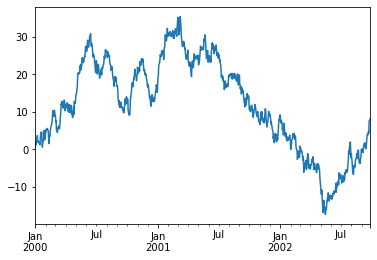

In [134]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [135]:
df = df_movies.copy()
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


<AxesSubplot:xlabel='Date'>

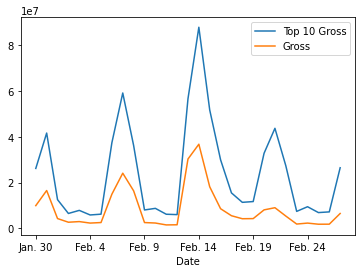

In [136]:
df.plot(x='Date', y=['Top 10 Gross', 'Gross'])

In [137]:
df_iris = get_iris_df()
df_iris.sample(5)

,petalLength,petalWidth,sepalLength,sepalWidth,species
140,5.6,2.4,6.7,3.1,virginica
133,5.1,1.5,6.3,2.8,virginica
3,1.5,0.2,4.6,3.1,setosa
111,5.3,1.9,6.4,2.7,virginica
85,4.5,1.6,6.0,3.4,versicolor


<AxesSubplot:xlabel='petalLength', ylabel='petalWidth'>

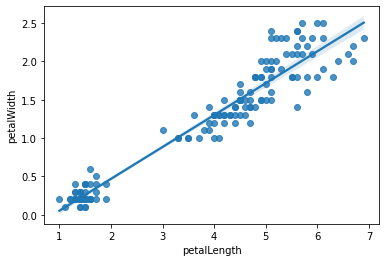

In [138]:
# 线性回归
sns.regplot(x='petalLength', y='petalWidth',data=df_iris)

## 使用另一个 DataFrame 来更新数据

In [139]:
df_1 = df_movies.copy()
df_2 = pd.DataFrame({u'#1 Movie':[u'American Sniper',
                            u'SpongeBob',
                            u'Fifty Shades of Grey'],
                            u'chs':[u'美国阻击手',
                                    u'海绵宝宝',
                                    u'五十度灰']})
df_1.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


In [140]:
df_2.head()

,#1 Movie,chs
0,American Sniper,美国阻击手
1,SpongeBob,海绵宝宝
2,Fifty Shades of Grey,五十度灰


In [141]:
pd.merge(df_1, df_2, on=u'#1 Movie').head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,chs
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,美国阻击手
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,美国阻击手
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,美国阻击手
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,美国阻击手
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,美国阻击手


## 导出数据

### CSV

In [142]:
# 导出周六的数据，格式为 CSV
# df[ (df['Day'] == 'Sat') ].to_csv('test_tmp.csv', mode='w', encoding='utf-8', index=False)

#在前面的文件中追加周日的数据
# df[ (df['Day'] == 'Sun') ].to_csv('test_output.csv', mode='a', header=False, encoding='utf-8', index=False)

### Dict

In [143]:
# 输出为 dict 格式
# DataFrame.to_dict可以接受 ‘dict’, ‘list’, ‘series’, ‘split’, ‘records’, ‘index’
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [144]:
import pprint
for p in ['dict', 'list', 'series', 'split', 'records', 'index']:
    print(f'Parameters:{p}')
    pprint.pprint(df.to_dict(p))
    print('-----------------------------------------------------')

Parameters:dict
{'AAA': {0: 4, 1: 5, 2: 6, 3: 7},
 'BBB': {0: 10, 1: 20, 2: 30, 3: 40},
 'CCC': {0: 100, 1: 50, 2: -30, 3: -50}}
-----------------------------------------------------
Parameters:list
{'AAA': [4, 5, 6, 7], 'BBB': [10, 20, 30, 40], 'CCC': [100, 50, -30, -50]}
-----------------------------------------------------
Parameters:series
{'AAA': 0    4
1    5
2    6
3    7
Name: AAA, dtype: int64,
 'BBB': 0    10
1    20
2    30
3    40
Name: BBB, dtype: int64,
 'CCC': 0    100
1     50
2    -30
3    -50
Name: CCC, dtype: int64}
-----------------------------------------------------
Parameters:split
{'columns': ['AAA', 'BBB', 'CCC'],
 'data': [[4, 10, 100], [5, 20, 50], [6, 30, -30], [7, 40, -50]],
 'index': [0, 1, 2, 3]}
-----------------------------------------------------
Parameters:records
[{'AAA': 4, 'BBB': 10, 'CCC': 100},
 {'AAA': 5, 'BBB': 20, 'CCC': 50},
 {'AAA': 6, 'BBB': 30, 'CCC': -30},
 {'AAA': 7, 'BBB': 40, 'CCC': -50}]
-----------------------------------------------

## Cheat Sheet

英文：https://www.dataquest.io/blog/pandas-cheat-sheet/

中文翻译：http://blog.csdn.net/qq_33399185/article/details/60872853

## 相关资源

* pandas 英文最新文档 https://pandas.pydata.org/pandas-docs/stable/pandas.pdf